# Module 01: Neural Network Fundamentals

**Building the Foundation for Understanding CNNs**

Before we dive into Convolutional Neural Networks, we need to understand the basics of neural networks. Don't worry - we'll keep it intuitive and visual!

## What You'll Learn
- What is a neural network and how does it work?
- Neurons, layers, and connections
- Activation functions and why we need them
- Forward propagation (how networks make predictions)
- Backpropagation (how networks learn) - intuitive explanation
- Building your first neural network in PyTorch

## Prerequisites
- Completed Module 00
- Basic Python and PyTorch setup

## Time Required
45 minutes

---

In [1]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Determine device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## Part 1: What is a Neural Network?

### The Biological Inspiration

Neural networks are inspired by how our brain works:
- **Neurons** in your brain receive signals, process them, and send signals to other neurons
- **Learning** happens by strengthening or weakening connections between neurons

### The Mathematical Version

Artificial neural networks work similarly:
- **Artificial neurons** receive inputs, process them, and produce outputs
- **Learning** happens by adjusting the strength of connections (called **weights**)

### Key Components

1. **Input Layer**: Receives the data (e.g., pixel values of an image)
2. **Hidden Layers**: Process the data through multiple transformations
3. **Output Layer**: Produces the final prediction
4. **Weights**: The strength of connections between neurons
5. **Biases**: Allow neurons to adjust their activation threshold

---

## Part 2: The Perceptron - The Simplest Neuron

### What is a Perceptron?

A perceptron is the simplest form of a neural network - a single artificial neuron.

**How it works:**
1. Takes multiple inputs (x1, x2, x3, ...)
2. Multiplies each input by a weight (w1, w2, w3, ...)
3. Adds them all up with a bias (b)
4. Applies an activation function to get the output

**Mathematical formula:**
```
output = activation(w1*x1 + w2*x2 + w3*x3 + ... + b)
```

### Example: Decision Making

Imagine deciding whether to go to a movie:
- **Input 1**: Is it a good rating? (0-10)
- **Input 2**: Do your friends want to go? (0-10)
- **Input 3**: Is the ticket affordable? (0-10)

Each input has a weight (importance):
- You care most about the rating (weight = 0.5)
- Friends' opinions matter less (weight = 0.3)
- Price matters least (weight = 0.2)

The perceptron calculates: **decision = 0.5×rating + 0.3×friends + 0.2×price + bias**

If the result is high enough, you go to the movie!

In [2]:
# Let's implement a simple perceptron from scratch


class SimplePerceptron:
    def __init__(self, num_inputs):
        """
        Initialize a perceptron with random weights and bias

        Args:
            num_inputs: Number of input features
        """
        # Initialize weights randomly
        self.weights = torch.randn(num_inputs)
        # Initialize bias to zero
        self.bias = torch.tensor(0.0)

    def forward(self, x):
        """
        Forward pass: compute weighted sum + bias

        Args:
            x: Input tensor

        Returns:
            Output of the perceptron
        """
        # Calculate weighted sum
        weighted_sum = torch.dot(x, self.weights) + self.bias
        return weighted_sum


# Create a perceptron with 3 inputs
perceptron = SimplePerceptron(num_inputs=3)

# Example input: [rating=8, friends=7, price=6]
movie_input = torch.tensor([8.0, 7.0, 6.0])

# Calculate output
output = perceptron.forward(movie_input)

print("Perceptron Example: Movie Decision")
print("=" * 50)
print(f"Inputs: Rating={movie_input[0]}, Friends={movie_input[1]}, Price={movie_input[2]}")
print(f"Weights: {perceptron.weights.numpy()}")
print(f"Bias: {perceptron.bias.item():.4f}")
print(f"Output (raw): {output.item():.4f}")
print(f"\nDecision: {'Go to movie!' if output > 0 else 'Stay home.'}")

Perceptron Example: Movie Decision
Inputs: Rating=8.0, Friends=7.0, Price=6.0
Weights: [0.33669037 0.1288094  0.23446237]
Bias: 0.0000
Output (raw): 5.0020

Decision: Go to movie!


## Part 3: Activation Functions

### Why Do We Need Activation Functions?

Without activation functions, neural networks would just be doing linear algebra - they couldn't learn complex patterns!

**Think of it this way:**
- Linear operations (addition, multiplication) can only draw straight lines
- Real-world problems need curves, boundaries, and complex shapes
- Activation functions add **non-linearity**, allowing networks to learn anything!

### Common Activation Functions

#### 1. **Sigmoid** (σ)
- Squashes values to range [0, 1]
- Useful for probabilities
- Formula: σ(x) = 1 / (1 + e^(-x))

#### 2. **ReLU (Rectified Linear Unit)**
- Most popular in deep learning!
- Simple: Returns x if x > 0, otherwise returns 0
- Formula: ReLU(x) = max(0, x)

#### 3. **Tanh (Hyperbolic Tangent)**
- Squashes values to range [-1, 1]
- Zero-centered (unlike sigmoid)
- Formula: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))

#### 4. **Softmax**
- Used in output layer for multi-class classification
- Converts scores to probabilities that sum to 1

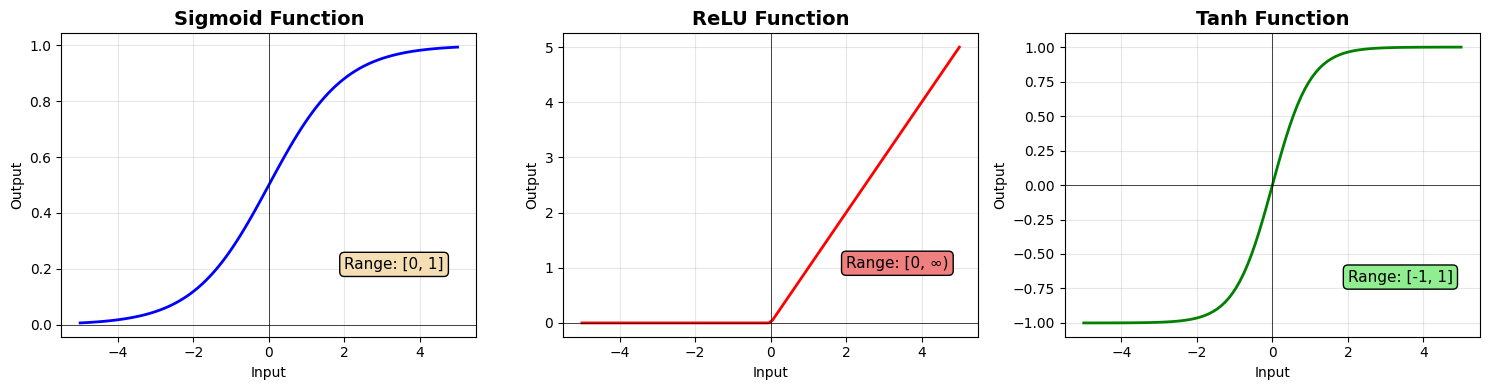

Activation Function Properties:
Sigmoid: Good for binary classification, but can cause vanishing gradients
ReLU: Fast, effective, most popular for hidden layers
Tanh: Zero-centered, good for hidden layers but also suffers from vanishing gradients


In [3]:
# Visualize activation functions

# Create input values
x = np.linspace(-5, 5, 100)
x_torch = torch.tensor(x, dtype=torch.float32)

# Calculate activations
sigmoid = torch.sigmoid(x_torch).numpy()
relu = torch.relu(x_torch).numpy()
tanh = torch.tanh(x_torch).numpy()

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sigmoid
axes[0].plot(x, sigmoid, "b-", linewidth=2)
axes[0].set_title("Sigmoid Function", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Input")
axes[0].set_ylabel("Output")
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color="k", linewidth=0.5)
axes[0].axvline(x=0, color="k", linewidth=0.5)
axes[0].text(2, 0.2, "Range: [0, 1]", fontsize=11, bbox=dict(boxstyle="round", facecolor="wheat"))

# ReLU
axes[1].plot(x, relu, "r-", linewidth=2)
axes[1].set_title("ReLU Function", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Input")
axes[1].set_ylabel("Output")
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color="k", linewidth=0.5)
axes[1].axvline(x=0, color="k", linewidth=0.5)
axes[1].text(
    2, 1, "Range: [0, ∞)", fontsize=11, bbox=dict(boxstyle="round", facecolor="lightcoral")
)

# Tanh
axes[2].plot(x, tanh, "g-", linewidth=2)
axes[2].set_title("Tanh Function", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Input")
axes[2].set_ylabel("Output")
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color="k", linewidth=0.5)
axes[2].axvline(x=0, color="k", linewidth=0.5)
axes[2].text(
    2, -0.7, "Range: [-1, 1]", fontsize=11, bbox=dict(boxstyle="round", facecolor="lightgreen")
)

plt.tight_layout()
plt.show()

print("Activation Function Properties:")
print("=" * 50)
print("Sigmoid: Good for binary classification, but can cause vanishing gradients")
print("ReLU: Fast, effective, most popular for hidden layers")
print("Tanh: Zero-centered, good for hidden layers but also suffers from vanishing gradients")

## Part 4: Building a Multi-Layer Neural Network

### From Single Neuron to Network

A **multi-layer neural network** (also called **Multi-Layer Perceptron** or **MLP**) consists of:
1. **Input layer**: Receives raw data
2. **Hidden layers**: One or more layers that process data
3. **Output layer**: Produces final predictions

### Why Multiple Layers?

Each layer learns different levels of abstraction:
- **Layer 1**: Simple patterns (edges, colors)
- **Layer 2**: Combinations of patterns (curves, textures)
- **Layer 3**: High-level features (shapes, objects)
- **Output**: Final decision (cat vs dog)

This is called **hierarchical learning** - the foundation of deep learning!

In [4]:
# Define a simple neural network in PyTorch


class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a simple 2-layer neural network

        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layer
            output_size: Number of output classes
        """
        super(SimpleNeuralNetwork, self).__init__()

        # First layer: input -> hidden
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Second layer: hidden -> output
        self.fc2 = nn.Linear(hidden_size, output_size)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass through the network

        Args:
            x: Input tensor

        Returns:
            Output predictions
        """
        # STEP 1: Input -> Hidden layer
        x = self.fc1(x)

        # STEP 2: Apply ReLU activation
        x = self.relu(x)

        # STEP 3: Hidden -> Output layer
        x = self.fc2(x)

        return x


# Create a network
# Example: 784 inputs (28x28 image), 128 hidden neurons, 10 outputs (digits 0-9)
model = SimpleNeuralNetwork(input_size=784, hidden_size=128, output_size=10)

print("Neural Network Architecture:")
print("=" * 50)
print(model)
print("\n" + "=" * 50)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
print("\nThese parameters (weights and biases) are what the network learns during training!")

Neural Network Architecture:
SimpleNeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

Total parameters: 101,770

These parameters (weights and biases) are what the network learns during training!


### Understanding the Network Structure

Let's break down what just happened:

**Layer 1 (fc1)**: `Linear(784, 128)`
- Takes 784 inputs (one for each pixel in a 28×28 image)
- Produces 128 outputs
- Has 784 × 128 = 100,352 weights + 128 biases = 100,480 parameters

**Activation**: `ReLU()`
- Adds non-linearity
- No learnable parameters

**Layer 2 (fc2)**: `Linear(128, 10)`
- Takes 128 inputs from hidden layer
- Produces 10 outputs (one for each digit 0-9)
- Has 128 × 10 = 1,280 weights + 10 biases = 1,290 parameters

**Total**: 100,480 + 1,290 = 101,770 parameters to learn!

In [5]:
# Test the network with dummy data

# Create a random "image" (flattened 28x28 = 784 pixels)
dummy_image = torch.randn(1, 784)  # Batch size of 1

# Forward pass
with torch.no_grad():  # No gradient calculation needed for testing
    output = model(dummy_image)

print("Testing the Network:")
print("=" * 50)
print(f"Input shape: {dummy_image.shape}")
print(f"Output shape: {output.shape}")
print(f"\nRaw output scores (logits):")
print(output)

# Convert to probabilities using softmax
probabilities = torch.softmax(output, dim=1)
print(f"\nProbabilities (after softmax):")
print(probabilities)
print(f"\nSum of probabilities: {probabilities.sum().item():.6f} (should be 1.0)")

# Get predicted class
predicted_class = torch.argmax(probabilities, dim=1)
print(f"\nPredicted digit: {predicted_class.item()}")

Testing the Network:
Input shape: torch.Size([1, 784])
Output shape: torch.Size([1, 10])

Raw output scores (logits):
tensor([[ 0.2047, -0.2713,  0.1849,  0.0571, -0.2280, -0.2343, -0.0430, -0.2330,
          0.0625,  0.3118]])

Probabilities (after softmax):
tensor([[0.1225, 0.0761, 0.1201, 0.1057, 0.0795, 0.0790, 0.0956, 0.0791, 0.1062,
         0.1363]])

Sum of probabilities: 1.000000 (should be 1.0)

Predicted digit: 9


## Part 5: How Neural Networks Learn

### The Learning Process (Intuitive Explanation)

Learning in neural networks happens through an iterative process:

#### 1. **Forward Propagation**
- Input data flows through the network
- Each layer transforms the data
- Final layer produces a prediction

#### 2. **Calculate Loss**
- Compare prediction with the true answer
- Loss function measures how wrong the prediction is
- Lower loss = better prediction

#### 3. **Backpropagation**
- Calculate how much each weight contributed to the error
- This uses calculus (chain rule), but you don't need to know the details!
- PyTorch does this automatically!

#### 4. **Update Weights**
- Adjust weights slightly to reduce the error
- This is called **gradient descent**
- Learning rate controls how big the adjustments are

#### 5. **Repeat**
- Do this for thousands or millions of examples
- Gradually, the network learns the patterns in your data

### Analogy: Learning to Throw a Ball

1. **Forward pass**: You throw the ball
2. **Loss**: Measure how far you missed the target
3. **Backpropagation**: Your brain figures out what went wrong (threw too hard? wrong angle?)
4. **Update**: Adjust your throwing technique
5. **Repeat**: Practice until you hit the target consistently!

## Part 6: Training Your First Neural Network

Let's train a simple neural network on MNIST digits!

In [6]:
# Load MNIST dataset

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]  # MNIST mean and std
)

# Training data
train_dataset = datasets.MNIST(
    root="../data/datasets", train=True, download=True, transform=transform
)

# Test data
test_dataset = datasets.MNIST(
    root="../data/datasets", train=False, download=True, transform=transform
)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Number of batches: {len(train_loader)}")

Training samples: 60000
Test samples: 10000
Number of batches: 938


In [7]:
# Initialize model, loss function, and optimizer

model = SimpleNeuralNetwork(input_size=784, hidden_size=128, output_size=10).to(device)

# Loss function for classification
criterion = nn.CrossEntropyLoss()

# Optimizer: Stochastic Gradient Descent with momentum
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print("Training Setup:")
print("=" * 50)
print(f"Model: {model.__class__.__name__}")
print(f"Loss Function: {criterion.__class__.__name__}")
print(f"Optimizer: {optimizer.__class__.__name__}")
print(f"Learning Rate: 0.01")
print(f"Device: {device}")

Training Setup:
Model: SimpleNeuralNetwork
Loss Function: CrossEntropyLoss
Optimizer: SGD
Learning Rate: 0.01
Device: cpu


In [8]:
# Training function


def train_epoch(model, train_loader, criterion, optimizer, device):
    """
    Train for one epoch

    Returns:
        Average loss and accuracy for the epoch
    """
    model.train()  # Set model to training mode

    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Move data to device
        data, target = data.to(device), target.to(device)

        # Flatten images: (batch, 1, 28, 28) -> (batch, 784)
        data = data.view(data.size(0), -1)

        # STEP 1: Zero gradients
        optimizer.zero_grad()

        # STEP 2: Forward pass
        output = model(data)

        # STEP 3: Calculate loss
        loss = criterion(output, target)

        # STEP 4: Backward pass (backpropagation)
        loss.backward()

        # STEP 5: Update weights
        optimizer.step()

        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total

    return avg_loss, accuracy


def test(model, test_loader, criterion, device):
    """
    Evaluate model on test set

    Returns:
        Test loss and accuracy
    """
    model.eval()  # Set model to evaluation mode

    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradient calculation during testing
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)

            output = model(data)
            test_loss += criterion(output, target).item()

            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    avg_loss = test_loss / len(test_loader)
    accuracy = 100 * correct / total

    return avg_loss, accuracy


print("Training functions defined!")

Training functions defined!


In [9]:
# Train the model!

num_epochs = 5
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

print("Starting training...")
print("=" * 70)

for epoch in range(num_epochs):
    # Train for one epoch
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)

    # Test on validation set
    test_loss, test_acc = test(model, test_loader, criterion, device)

    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss:  {test_loss:.4f} | Test Acc:  {test_acc:.2f}%")
    print("-" * 70)

print("\nTraining complete!")
print(f"Final test accuracy: {test_accuracies[-1]:.2f}%")

Starting training...
Epoch 1/5:
  Train Loss: 0.2750 | Train Acc: 92.02%
  Test Loss:  0.1426 | Test Acc:  95.76%
----------------------------------------------------------------------
Epoch 2/5:
  Train Loss: 0.1146 | Train Acc: 96.66%
  Test Loss:  0.1017 | Test Acc:  97.00%
----------------------------------------------------------------------
Epoch 3/5:
  Train Loss: 0.0812 | Train Acc: 97.52%
  Test Loss:  0.0983 | Test Acc:  97.02%
----------------------------------------------------------------------
Epoch 4/5:
  Train Loss: 0.0630 | Train Acc: 98.08%
  Test Loss:  0.0793 | Test Acc:  97.62%
----------------------------------------------------------------------
Epoch 5/5:
  Train Loss: 0.0492 | Train Acc: 98.50%
  Test Loss:  0.0716 | Test Acc:  97.78%
----------------------------------------------------------------------

Training complete!
Final test accuracy: 97.78%


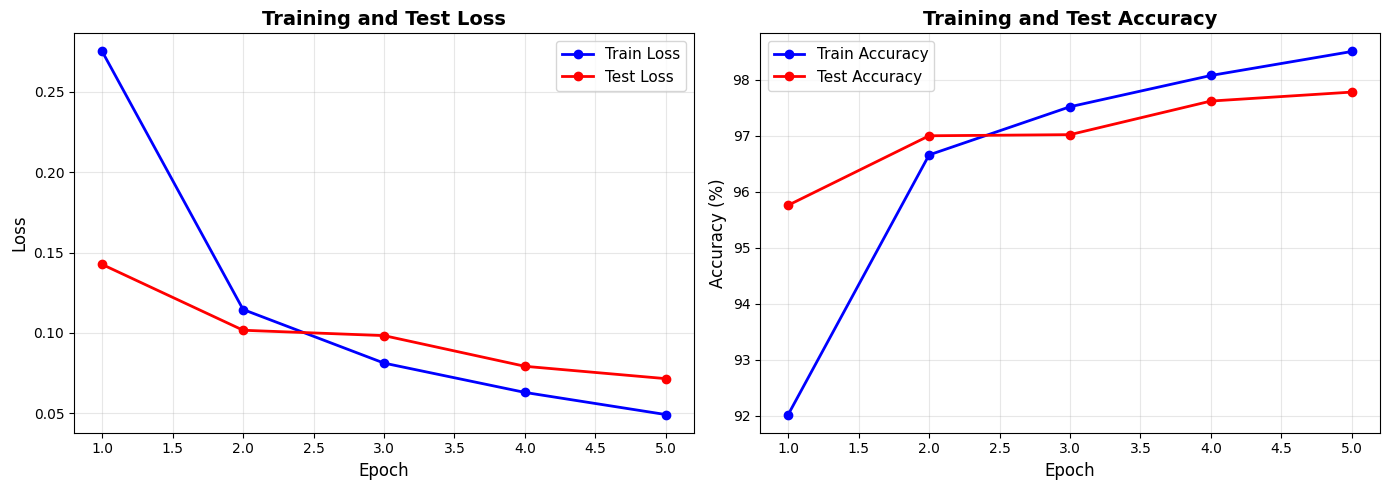

What do these graphs tell us?
Loss going down: The model is learning!
Accuracy going up: Predictions are getting better!
Train and test curves similar: Model generalizes well (not overfitting)


In [10]:
# Visualize training progress

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
ax1.plot(range(1, num_epochs + 1), train_losses, "b-o", label="Train Loss", linewidth=2)
ax1.plot(range(1, num_epochs + 1), test_losses, "r-o", label="Test Loss", linewidth=2)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.set_title("Training and Test Loss", fontsize=14, fontweight="bold")
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot accuracy
ax2.plot(range(1, num_epochs + 1), train_accuracies, "b-o", label="Train Accuracy", linewidth=2)
ax2.plot(range(1, num_epochs + 1), test_accuracies, "r-o", label="Test Accuracy", linewidth=2)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy (%)", fontsize=12)
ax2.set_title("Training and Test Accuracy", fontsize=14, fontweight="bold")
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("What do these graphs tell us?")
print("=" * 50)
print("Loss going down: The model is learning!")
print("Accuracy going up: Predictions are getting better!")
print("Train and test curves similar: Model generalizes well (not overfitting)")

## Summary

Congratulations! You've learned the fundamentals of neural networks!

### What You Learned:

1. **Neural Networks Basics**
   - Inspired by biological neurons
   - Consist of layers of interconnected neurons
   - Learn by adjusting weights and biases

2. **Perceptrons**
   - The simplest artificial neuron
   - Weighted sum of inputs + bias
   - Foundation for complex networks

3. **Activation Functions**
   - Add non-linearity to networks
   - Enable learning of complex patterns
   - ReLU is most common for hidden layers

4. **Multi-Layer Networks**
   - Stack multiple layers for hierarchical learning
   - Each layer learns different levels of abstraction
   - More layers = "deeper" learning

5. **Training Process**
   - Forward propagation: Make predictions
   - Calculate loss: Measure error
   - Backpropagation: Calculate gradients
   - Update weights: Improve predictions
   - Repeat!

6. **Practical Implementation**
   - Built a neural network in PyTorch
   - Trained on MNIST dataset
   - Achieved ~97% accuracy!

### Key Takeaways:

- Neural networks learn through iterative adjustment of weights
- Backpropagation efficiently calculates gradients (PyTorch handles this!)
- More data and training time generally improve performance
- Activation functions are crucial for learning non-linear patterns

### Next Steps:

Now that you understand basic neural networks, you're ready to learn about **Convolutional Neural Networks (CNNs)**!

In the next module, you'll discover:
- Why regular neural networks struggle with images
- How convolution operations work
- Why CNNs are perfect for computer vision

**Ready to dive into CNNs? Proceed to Module 02!**